In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import copy

In [2]:
customer_data = pd.read_csv('Downloads/customer_data.csv')
customer_data.head(15)

,age,salary,purchased
0,44,39000,0
1,32,120000,1
2,38,50000,0
3,32,135000,1
4,52,21000,1
5,53,104000,1
6,39,42000,0
7,38,61000,0
8,36,50000,0
9,36,63000,0


In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        400 non-null    int64
 1   salary     400 non-null    int64
 2   purchased  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
print(customer_data.isnull().sum())

age          0
salary       0
purchased    0
dtype: int64


In [5]:
print(customer_data.duplicated().sum())

33


In [6]:
cus = customer_data.drop_duplicates()
print(cus)

     age  salary  purchased
0     44   39000          0
1     32  120000          1
2     38   50000          0
3     32  135000          1
4     52   21000          1
..   ...     ...        ...
394   24   84000          0
395   27   96000          1
396   23   63000          0
398   48   90000          1
399   42  104000          1

[367 rows x 3 columns]


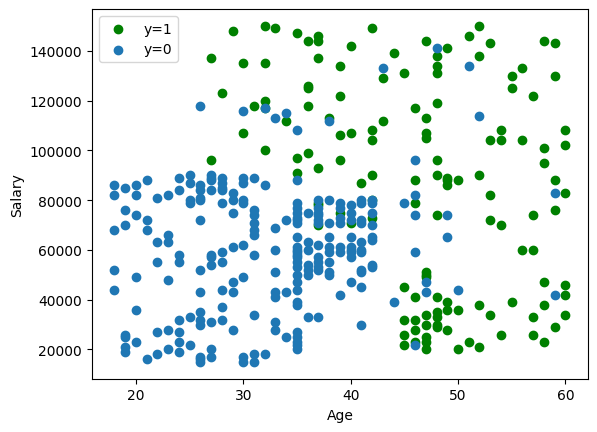

In [7]:
pos = cus['purchased'] == 1
neg = cus['purchased'] == 0

plt.scatter(cus['age'][pos], cus['salary'][pos], marker='o', c = 'g', label="y=1")
plt.scatter(cus['age'][neg],  cus['salary'][neg], marker='o', label="y=0")

plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

plt.show()

In [8]:
# Shuffle data frame using sample function to split the data into train and test

cus = cus.sample(frac=1)
cus

,age,salary,purchased
33,42,149000,1
257,26,32000,0
154,42,75000,0
200,49,74000,0
314,20,86000,0
...,...,...,...
73,47,23000,1
317,19,85000,0
157,19,25000,0
64,37,33000,0


In [9]:
features = cus[['age','salary']]
pred = cus[['purchased']]

In [10]:
ratio = 0.8  #80% Train  20% Test
  
total_rows = cus.shape[0]
train_size = int(total_rows*ratio)
  
# Split data into test and train
xtrain = features[0:train_size]
xtest = features[train_size:]

ytrain = pred[0:train_size]
ytest = pred[train_size:]

print("X Train data:" ,xtrain.shape[0], "     X Test data:",xtest.shape[0])
print("Y Train data:" ,ytrain.shape[0], "     Y Test data:",ytest.shape[0])

X Train data: 293      X Test data: 74
Y Train data: 293      Y Test data: 74


In [11]:
# Normalization Function

def minmax(feature):
    maxi = feature.max()
    mini = feature.min()
    n = feature.shape[0]
    ft = pd.DataFrame(np.zeros(xtrain.shape))
    ft = (feature-mini)/(maxi-mini)
    return ft

In [12]:
xtrain = pd.DataFrame(xtrain)

xtrain['age'] = minmax(xtrain['age'])
xtrain['salary'] = minmax(xtrain['salary'])

print(xtrain)

          age    salary
33   0.571429  0.992593
257  0.190476  0.125926
154  0.571429  0.444444
200  0.738095  0.437037
314  0.047619  0.525926
..        ...       ...
286  0.238095  0.518519
379  0.690476  0.681481
24   0.571429  0.281481
263  0.452381  0.577778
136  0.023810  0.044444

[293 rows x 2 columns]


In [13]:
def segmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [14]:
def computeCost(x,y,w,b):
    x = np.array(x)
    y = np.array(y)
    m = x.shape[0]
    cost = 0
    for i in range(m):
        z = np.dot(x[i],w) + b
        f_wb = segmoid(z)
        cost = cost + (-y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb))
    cost = cost/m
    return cost

In [15]:
w_tmp = np.array([1,1])
b_tmp = -1
print(computeCost(xtrain, ytrain, w_tmp, b_tmp))

[0.57621683]


In [16]:
def gradient(x,y,w,b):
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        z = np.dot(x[i],w) + b
        f_wb = segmoid(z)
        err = f_wb - y[i]
        dj_db = dj_db + err
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err*x[i,j]
    dj_db = dj_db / m
    dj_dw = dj_dw / m
    return dj_dw, dj_db

In [17]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    cost_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient(X,y,w_in,b_in)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        if i<100000: 
            cost_history.append( computeCost(X, y, w, b) )
    return w, b, cost_history        

In [18]:
w_tmp  = np.array([0,0])
b_tmp  = 0.
alph = 0.0003
iters = 10000

xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
w_out, b_out, cost_history = gradient_descent(xtrain, ytrain, w_tmp, b_tmp, alph, iters) 
print(f"updated parameters: w:{w_out}, b:{b_out}")

updated parameters: w:[ 0.07935154 -0.00428517], b:[-0.33276451]


In [19]:
#cost_history

In [20]:
def predict(x, w, b):
    z = np.dot(x, w) + b
    ypred = segmoid(z)
    print(ypred)
    return np.where(ypred <= 0.5, 0, 1) 

In [21]:
computeCost(xtrain, ytrain, w_out, b_out)

array([0.66525027])

In [22]:
xtest2 = np.array(minmax(xtest))

In [23]:
ypred = np.array(predict(xtest2, w_out, b_out))
ypred

[0.41699016 0.43672831 0.42599598 0.42124042 0.43415449 0.42169294
 0.4253341  0.42721866 0.4353957  0.42485601 0.4206692  0.42339805
 0.42436988 0.42637614 0.42733335 0.43043693 0.43595899 0.42786952
 0.41976136 0.43546512 0.42501856 0.42124859 0.41831632 0.42811077
 0.43027386 0.43245498 0.41901599 0.42331988 0.42355335 0.42470877
 0.43066319 0.42555861 0.43021177 0.43182704 0.43621778 0.43601661
 0.42823372 0.42818454 0.43265219 0.42993385 0.43557212 0.43042159
 0.42816351 0.42688744 0.42139089 0.43629654 0.43012614 0.42020067
 0.43534633 0.43082736 0.42166845 0.43374439 0.42949903 0.42936422
 0.42494137 0.43042979 0.42792689 0.43268042 0.42240232 0.42315644
 0.41713667 0.42487593 0.42672364 0.42530137 0.42593868 0.4234343
 0.43174133 0.4236749  0.42645803 0.43088483 0.41745769 0.41794625
 0.42617608 0.4188693 ]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, ypred))

0.6756756756756757
